In [2]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
# sklearn 라이브러리에서 제공하는 Regression 테스트 데이터 생성하는 함수 사용해서 데이터 만들기
X, y = datasets.make_regression(
    n_samples=100,
    n_features=1,
    noise=20,
    random_state=10
)

In [10]:
# 테스트 데이터 확인해보기
print(X.shape, y.shape)

(100, 1) (100,)


In [12]:
print(X[:10])

[[-1.13660221]
 [-1.41855603]
 [ 1.74481415]
 [-0.23218226]
 [-0.48933722]
 [ 0.2890942 ]
 [ 1.3315865 ]
 [-0.52929608]
 [ 1.12878515]
 [-0.17460021]]


In [16]:
print(y[:10])

[-20.12440236 -38.38388422  86.88899101 -12.86824711 -20.94330643
  30.32606253  80.91478871 -21.32654452  14.56690028  28.15574665]


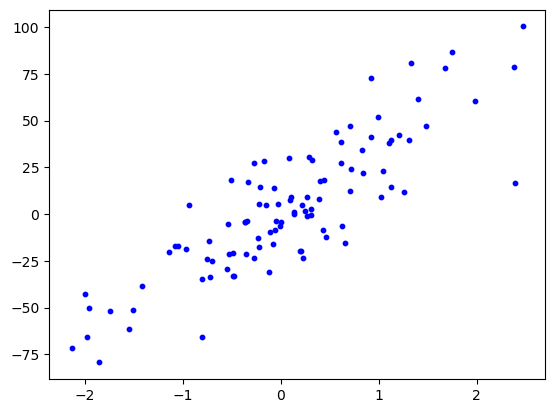

In [22]:
# Scatter로 데이터 찍어보기
plt.scatter(
    X[:, 0], 
    y,
    color='b',
    marker='o',
    s=10
)
plt.show()

In [88]:
# 초기값 설정
LEARN_RATE = 0.001 # 학습률
ITERS = 1000 # 반복횟수

In [90]:
# 변수들 초기화하기
N_SAMPLES = 0
N_FEATURES = 0

weights = None
bias = 0

In [92]:
# 훈련함수 만들기
def fit(X, y):
    global weights, bias
    N_SAMPLES, N_FEATURES = X.shape # Weights 배열 만들기 위해서 X 값에서 배열 크기 가져오기

    weights = np.zeros(N_FEATURES) # 특성 수 만큼의 weights 배열 만들기(각 특성의 weight 초기값 0)
    bias = 0

    for _ in range(ITERS):
        y_preds = np.dot(X, weights) + bias
        
        dw = (1/N_SAMPLES) * np.dot(X.T, (y_preds-y))
        db = (1/N_SAMPLES) * np.sum(y_preds-y)
    
        weights = weights - LEARN_RATE * dw
        bias = bias - LEARN_RATE * db

In [78]:
# 예측함수 만들기
def predict(X):
    global weights, bias
    return np.dot(X, weights) + bias

In [56]:
# 에러계산함수 만들기
def mse(y_test, predictions):
    return np.mean( (y_test-predictions)**2 )

In [94]:
# 훈련시키기
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=1234
)

fit(X_train, y_train)
print(weights, bias)

[31.00826961] 1.45830425596069


In [96]:
predictions = predict(X_test)
print(predictions)

[  1.19833558 -64.64239954  -5.13708147  23.53492139  35.80641985
  15.7501057   -0.58352356  23.63786754 -23.49067481  63.01234247
 -60.38439547  27.57423602  -0.46148065  53.3234248   47.49122786
  -6.95262649  18.98271061 -42.52866356   7.77099251  -5.44952267]


In [98]:
err = mse(y_test, predictions)
print(err)

311.9946331341979


In [100]:
y_pred_line = predict(X)

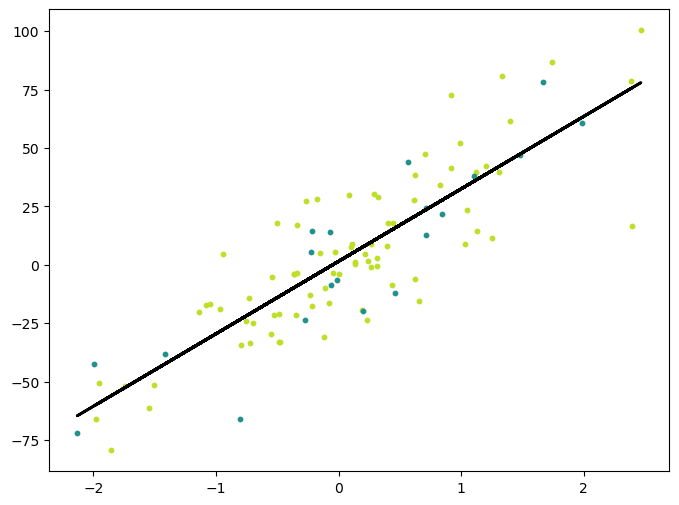

In [102]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
plt.scatter(
    X_train, y_train,
    color = cmap(0.9),
    s=10
)
plt.scatter(
    X_test, y_test,
    color = cmap(0.5),
    s=10
)
plt.plot(X, y_pred_line, color='black', linewidth=2)
plt.show()